# Load model parameters from stMSA_paras

To reuse the latent repersentation learned by stMSA, you can save the model parameters follows the [previous instruction](./train_clustering.ipynb) and load it by `eval_integration`.
The following tutorial will utilize the mouse brain serial dataset to illustrate this process.

## Data Preparation

First, we obtain the adata fromat data by `st_datasets`.

In [1]:
import scanpy as sc

import st_datasets as stds
from eval_integration import eval_integration

adata_list = [stds.get_data(stds.get_mouse_brain_sagittal_data, section=1, pos=p)[0] for p in ['Ant', 'Pos']]
adata_list[1].obsm['spatial'][:, 0] += 7800
adata_list[1].obsm['spatial'][:, 1] += 300
adatas = sc.concat(adata_list, label='batch')
adatas = adatas[:, adata_list[-1].var['highly_variable']]

>>> INFO: Use local data.
>>> INFO: dataset name: mouse brain sagittal, section: 1, position: Ant, size: (2696, 31053), cluster: 20.(1.485s)
>>> INFO: Use local data.
>>> INFO: dataset name: mouse brain sagittal, section: 1, position: Pos, size: (3353, 31053), cluster: 17.(1.123s)


## Get latent representation by load model parameter

Next, use the `eval_integration` function to get the representation via previous trained model parameters.

In [2]:
adatas = eval_integration(adata=adatas, radius=150, model_path='/root/stMSA_paras/mouse_brain_serial.pt')

>>> INFO: Generate 18382 edges, 5.818 edges per spot.(0.012s)
>>> INFO: Generate 22945 edges, 5.843 edges per spot.(0.014s)
>>> INFO: Successfully load model.


## Visualization

Moreover, we visualized the domain identification result.

R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In value[[3L]](cond) :
R[write to console]: 
 
R[write to console]:  "getThreads" not available for .C() for package "RevoUtilsMath"

R[write to console]: 2: 
R[write to console]: In value[[3L]](cond) :
R[write to console]: 
 
R[write to console]:  "getThreads" not available for .C() for package "RevoUtilsMath"

R[write to console]: 3: 
R[write to console]: In value[[3L]](cond) :
R[write to console]: 
 
R[write to console]:  "getThreads" not available for .C() for package "RevoUtilsMath"

R[write to console]: Package 'mclust' version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



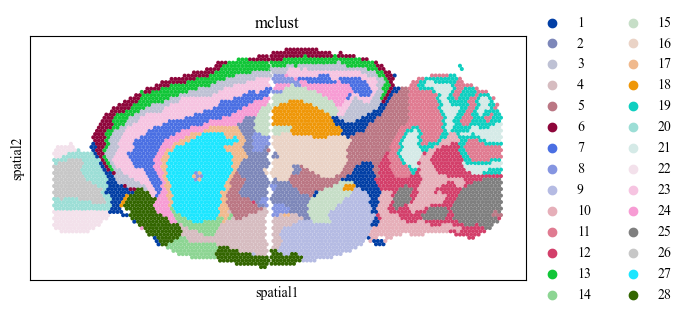

In [3]:
adatas = stds.cl.mclust_R(adatas, used_obsm='embedding', num_cluster=28)
sc.pl.spatial(adatas, color=['mclust'], spot_size=150)